In [60]:
pip install astropy

In [61]:
import requests
from astropy.io import fits
import io

# Download the FITS file from the GitHub URL
url = "https://raw.githubusercontent.com/Adrita-Khan/Astroinformatics/main/Basic%20Python%20Operations/Simple%20Datasets/RemoteAstrophotography-com_M51_FITS/M51_Lum.fit"
response = requests.get(url)

# Read the FITS file content into an in-memory buffer
fits_file = io.BytesIO(response.content)

# Open the FITS file
hdul = fits.open(fits_file)

# Inspect the FITS file's header and data
print(hdul.info())  # Info about HDUs (Header Data Units)


Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   (973, 874)   float32   
None


In [62]:
# Print the header of the primary HDU (Header Data Unit)
print(hdul[0].header)

# Print the shape of the image data
data = hdul[0].data
print(f"Image shape: {data.shape}")


SIMPLE  =                    T / Created by ImageJ FITS_Writer                  BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 973  / length of data axis 1                          NAXIS2  =                 874  / length of data axis 2                          EXTEND  = T                                / FITS dataset may contain extensionsCOMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   SWOWNER = 'Erik Westermann'                                                     SWMODIFY= 'MaxIm DL Version 5.24 131122 0AW35'    / Name of software that modifiFILTER  = 'Luminance'                                                           END                                                                                                                     

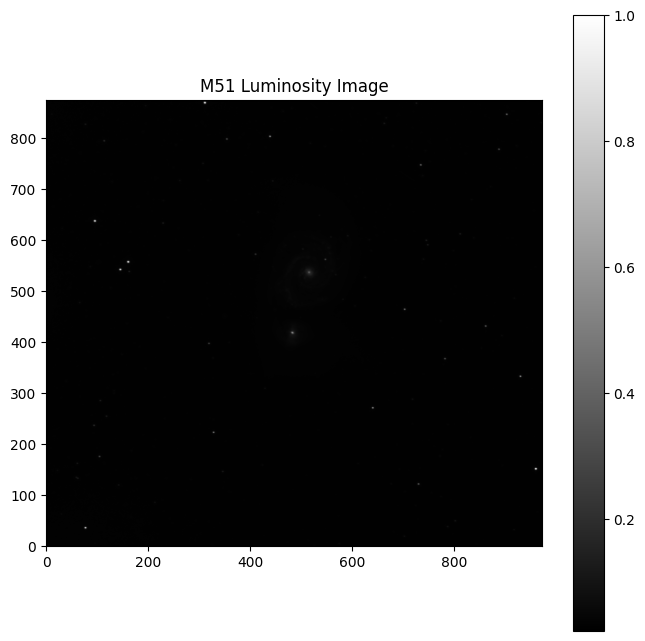

In [63]:
import matplotlib.pyplot as plt

# Visualize the data (image)
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('M51 Luminosity Image')
plt.show()


In [64]:
import numpy as np

# Calculate basic statistics
mean_value = np.mean(data)
median_value = np.median(data)
std_value = np.std(data)

print(f"Mean value: {mean_value}")
print(f"Median value: {median_value}")
print(f"Standard Deviation: {std_value}")


Mean value: 0.03069177083671093
Median value: 0.030110187828540802
Standard Deviation: 0.00836854986846447


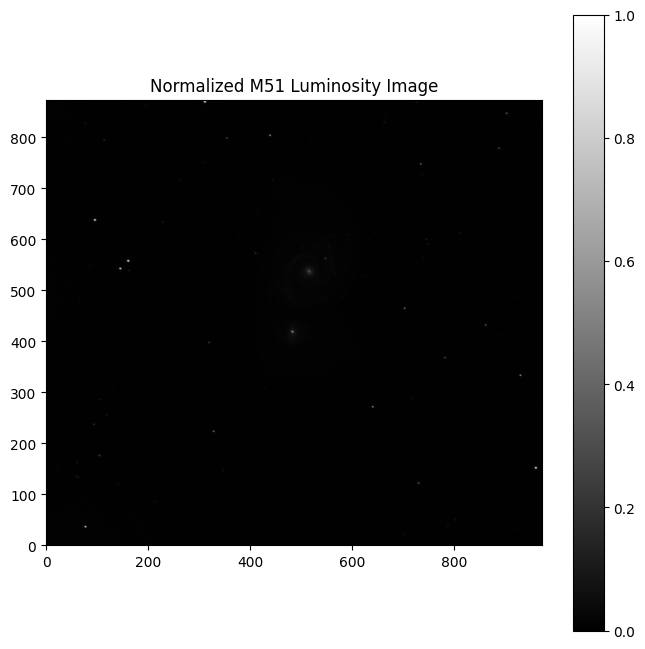

In [65]:
# Normalize the image data (min-max normalization)
data_min = np.min(data)
data_max = np.max(data)
normalized_data = (data - data_min) / (data_max - data_min)

# Visualize the normalized data
plt.figure(figsize=(8, 8))
plt.imshow(normalized_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Normalized M51 Luminosity Image')
plt.show()


In [66]:
# Save the normalized image as a PNG
plt.imsave('m51_lum_normalized.png', normalized_data, cmap='gray')

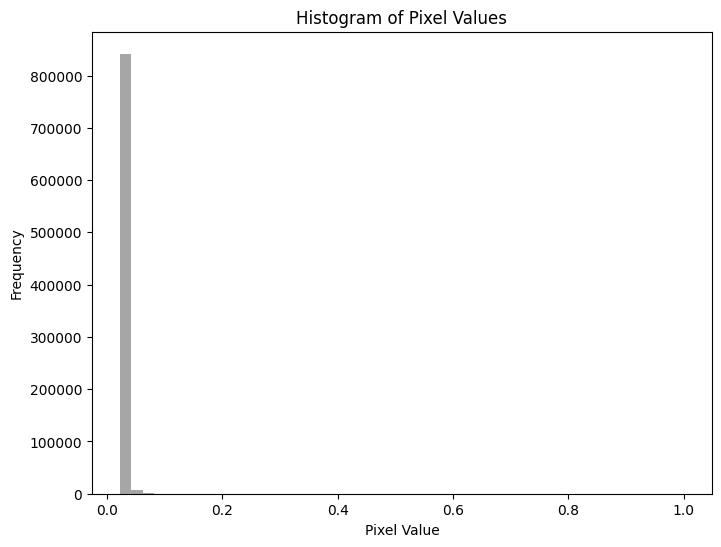

In [67]:
# Plot a histogram of the pixel values
plt.figure(figsize=(8, 6))
plt.hist(data.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


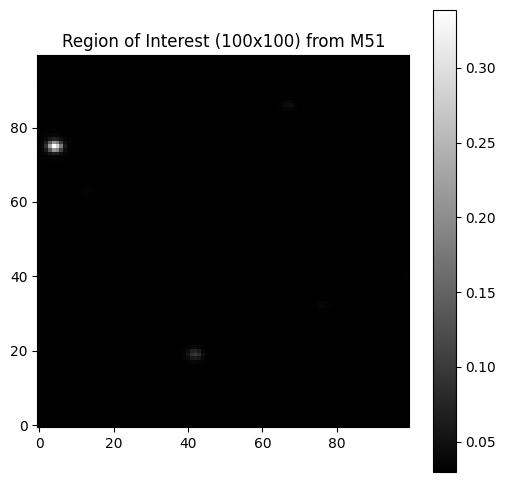

In [68]:
# Extract a region of interest (ROI) from the image (example: 100x100 pixel square)
roi = data[100:200, 100:200]

# Display the extracted region
plt.figure(figsize=(6, 6))
plt.imshow(roi, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Region of Interest (100x100) from M51')
plt.show()


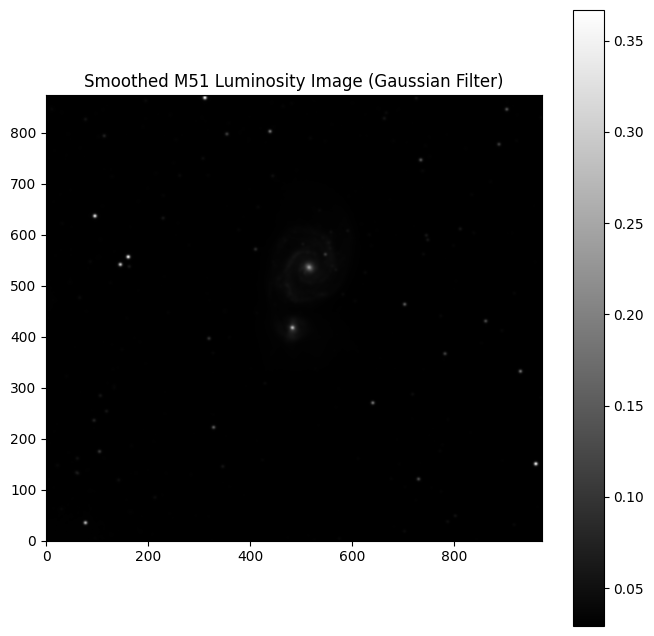

In [69]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian filter to the image data
smoothed_data = gaussian_filter(data, sigma=2)

# Visualize the smoothed image
plt.figure(figsize=(8, 8))
plt.imshow(smoothed_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Smoothed M51 Luminosity Image (Gaussian Filter)')
plt.show()


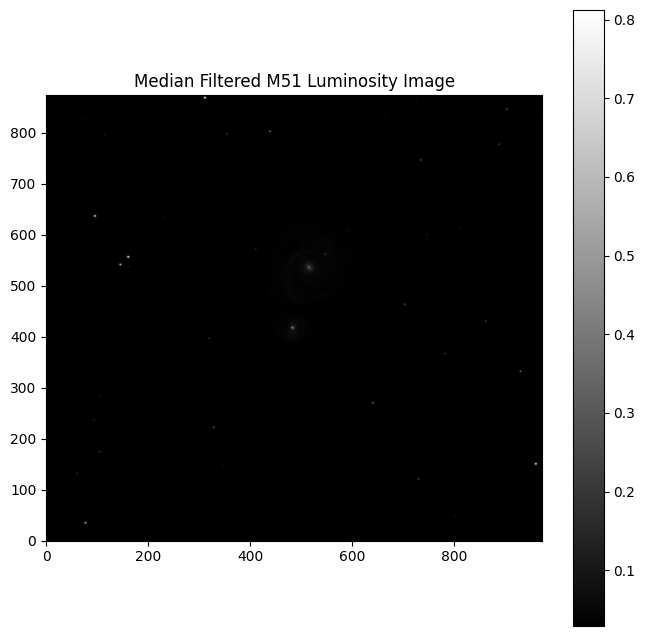

In [70]:
from scipy.ndimage import median_filter

# Apply median filter to the image data
median_filtered_data = median_filter(data, size=3)

# Visualize the median filtered image
plt.figure(figsize=(8, 8))
plt.imshow(median_filtered_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Median Filtered M51 Luminosity Image')
plt.show()


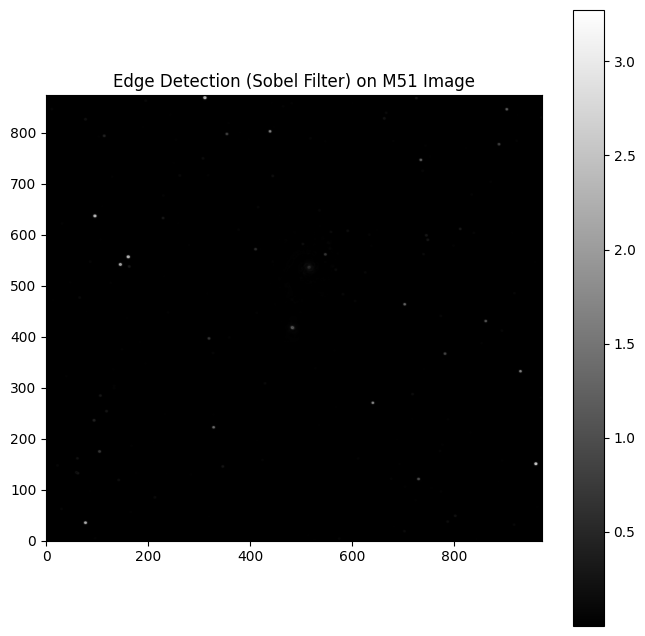

In [71]:
from scipy.ndimage import sobel

# Apply Sobel filter to detect edges in the image
edges_x = sobel(data, axis=0)  # Sobel filter in x direction
edges_y = sobel(data, axis=1)  # Sobel filter in y direction
edges = np.hypot(edges_x, edges_y)  # Combine the two gradients

# Visualize the edges
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Edge Detection (Sobel Filter) on M51 Image')
plt.show()


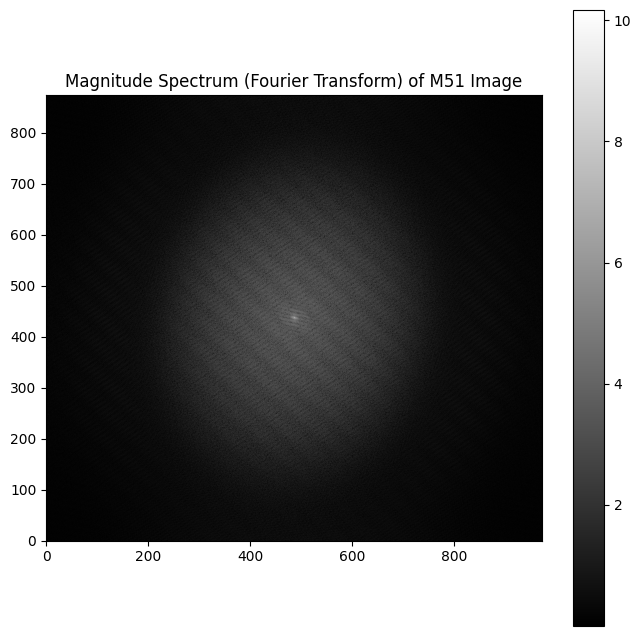

In [72]:
from numpy.fft import fft2, fftshift

# Apply 2D Fourier Transform to the image data
f_data = fft2(data)

# Shift the zero-frequency component to the center of the spectrum
fshift_data = fftshift(f_data)

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(fshift_data)

# Visualize the magnitude spectrum (log scale)
plt.figure(figsize=(8, 8))
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray', origin='lower')
plt.colorbar()
plt.title('Magnitude Spectrum (Fourier Transform) of M51 Image')
plt.show()


In [51]:
# Apply Inverse Fourier Transform to reconstruct the image
#inverse_f_data = np.fft.ifft2(fshift_data)

# Get the real part of the inverse transform (image reconstruction)
#reconstructed_image = np.real(inverse_f_data)

# Visualize the reconstructed image
#plt.figure(figsize=(8, 8))
#plt.imshow(reconstructed_image, cmap='gray', origin='lower')
#plt.colorbar()
#plt.title('Reconstructed M51 Image (Inverse Fourier Transform)')
#plt.show()


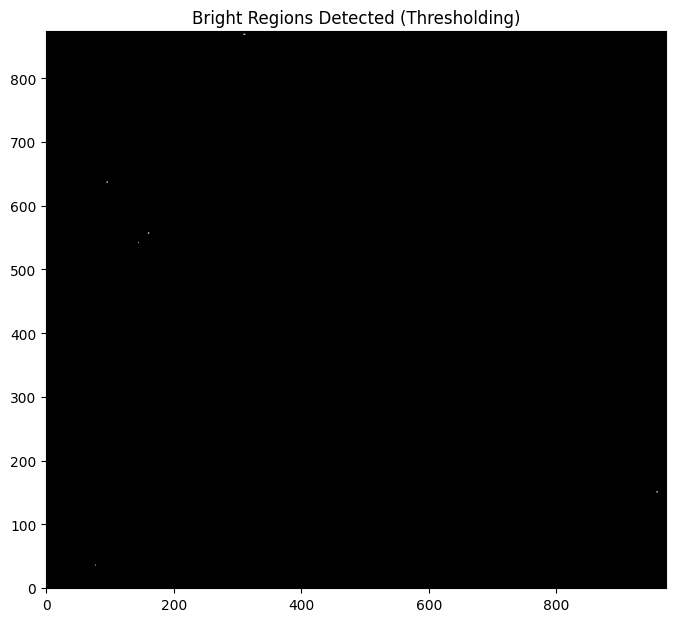

In [73]:
# Apply a threshold to detect bright regions
threshold_value = 0.8  # Define an appropriate threshold value (between 0 and 1)
binary_mask = normalized_data > threshold_value

# Visualize the binary mask (bright regions)
plt.figure(figsize=(8, 8))
plt.imshow(binary_mask, cmap='gray', origin='lower')
plt.title('Bright Regions Detected (Thresholding)')
plt.show()


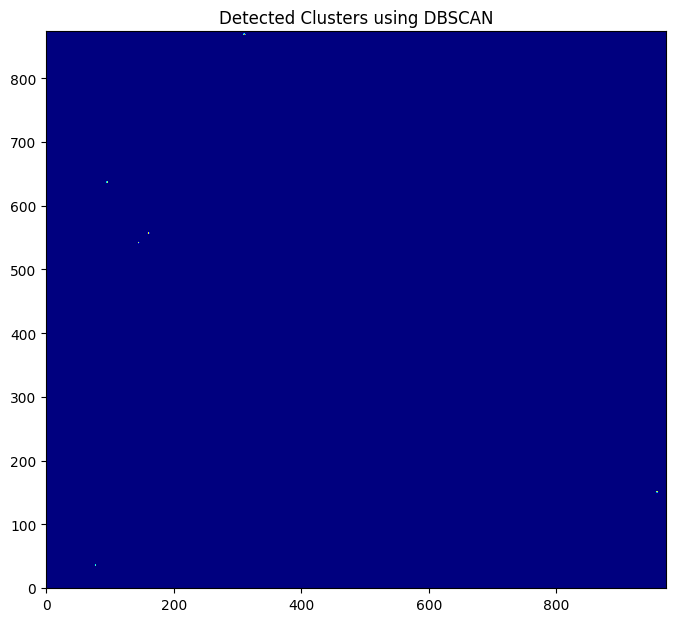

In [74]:
from sklearn.cluster import DBSCAN
from scipy.ndimage import label

# Flatten the image and remove background noise
pixels = np.column_stack(np.where(binary_mask))

# Apply DBSCAN clustering
db = DBSCAN(eps=3, min_samples=10).fit(pixels)

# Label the clusters
labels = db.labels_

# Visualize the detected clusters
plt.figure(figsize=(8, 8))
plt.imshow(binary_mask, cmap='jet', origin='lower')
plt.title('Detected Clusters using DBSCAN')
plt.show()


Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   (973, 874)   float32   
None
SIMPLE  =                    T / Created by ImageJ FITS_Writer                  BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 973  / length of data axis 1                          NAXIS2  =                 874  / length of data axis 2                          EXTEND  = T                                / FITS dataset may contain extensionsCOMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   SWOWNER = 'Erik Westermann'                                                     SWMODIFY= 'MaxIm DL Version 5.24 131122 0AW35'    / Name of software that modifiFILTER  = 'Luminance'              

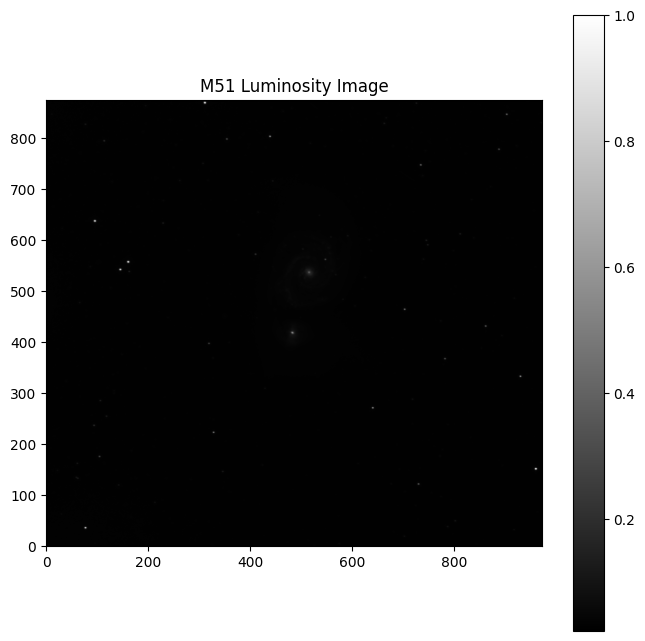

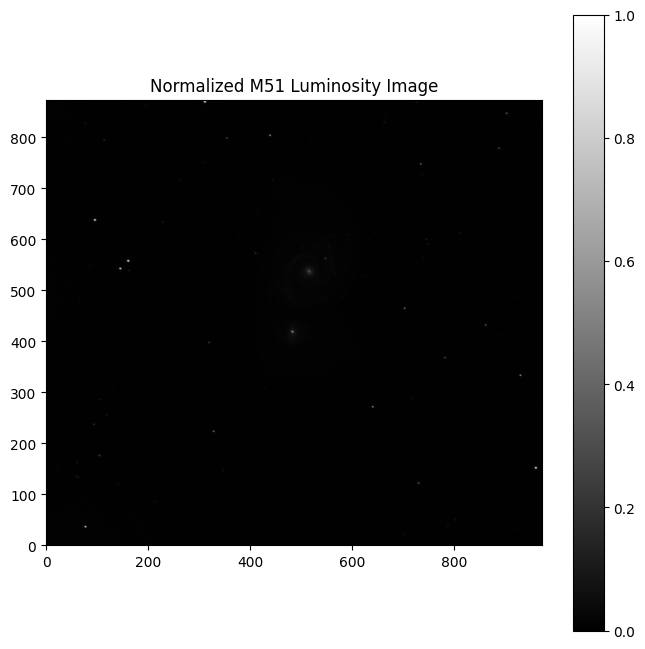

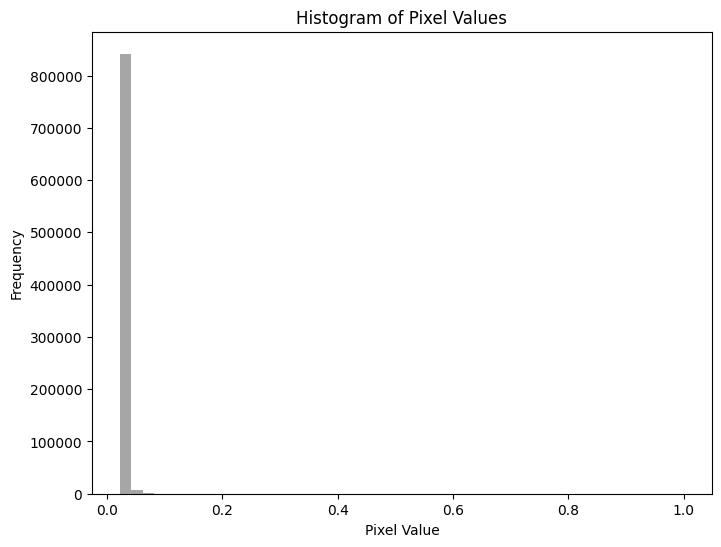

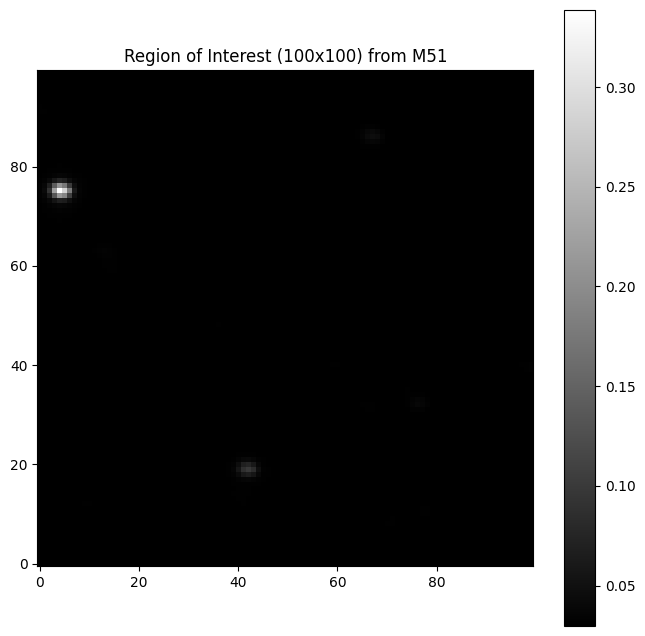

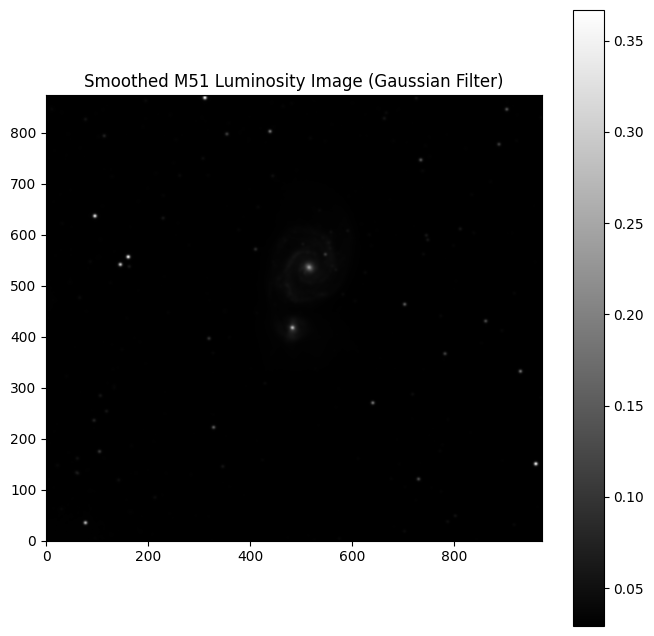

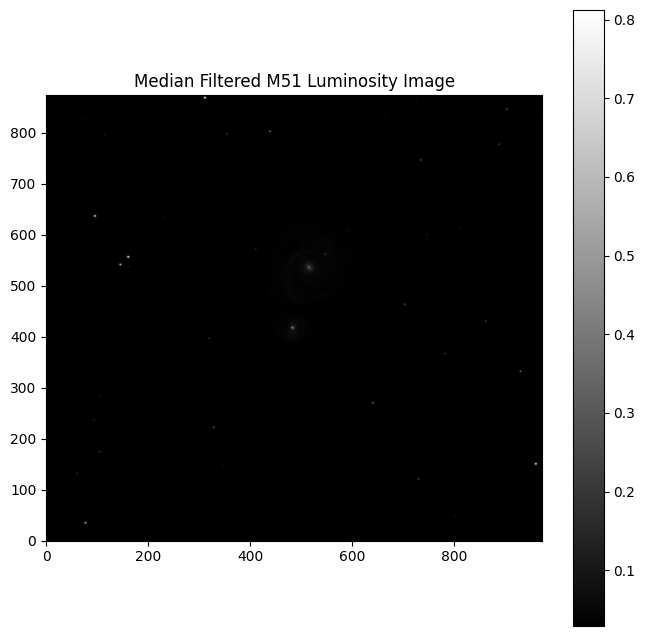

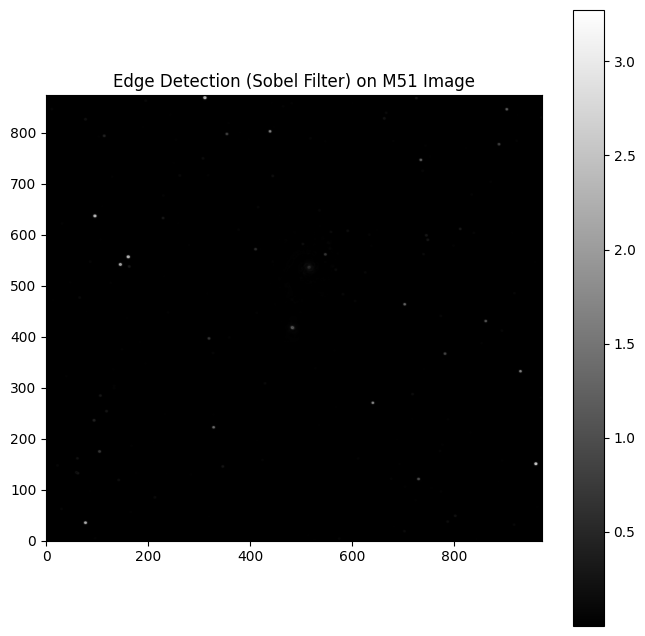

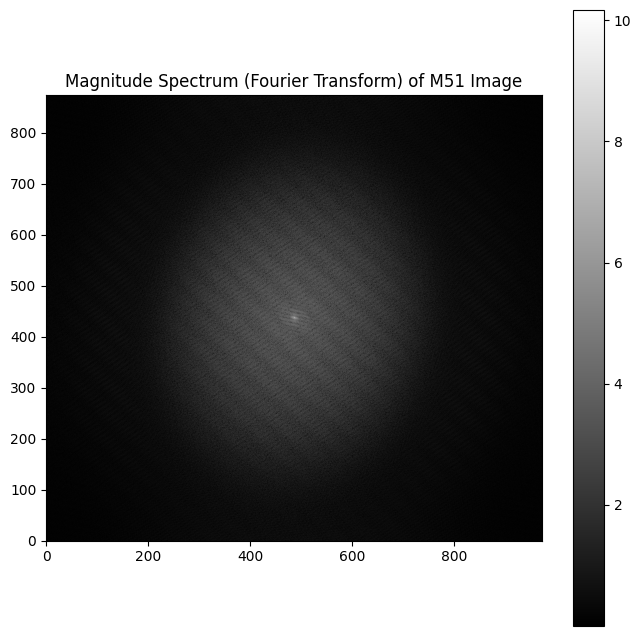

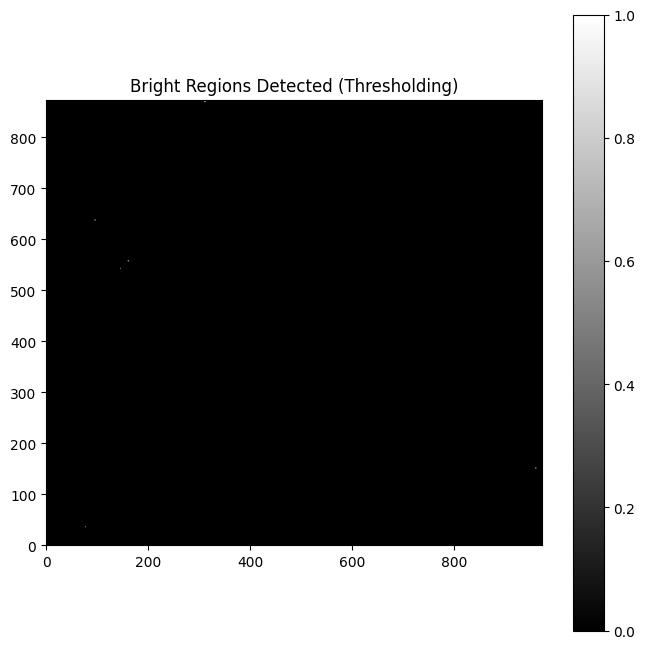

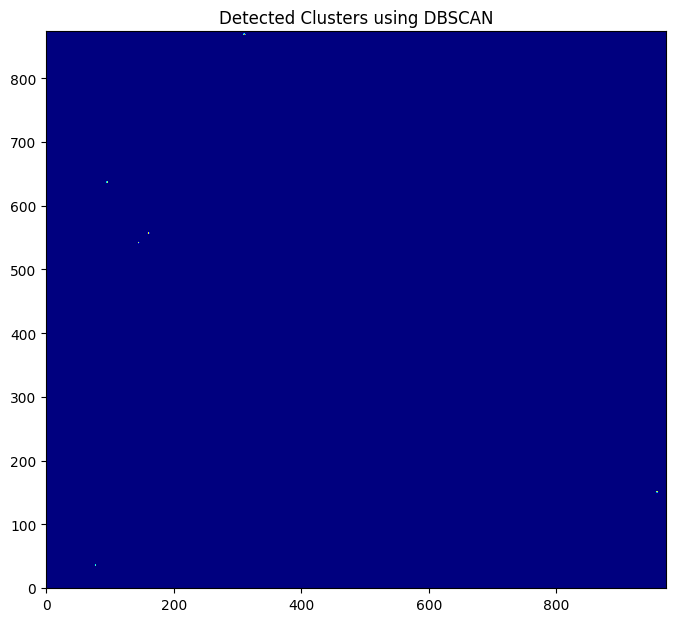

In [75]:
#Complete Script

import requests
from astropy.io import fits
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter, median_filter, sobel
from sklearn.cluster import DBSCAN
from numpy.fft import fft2, fftshift

# Install dependencies (in case it's running in a fresh environment)
# pip install astropy matplotlib numpy scipy scikit-learn

# Function to download and open a FITS file
def load_fits(url):
    response = requests.get(url)
    fits_file = io.BytesIO(response.content)
    hdul = fits.open(fits_file)
    return hdul

# Function to display image and its title
def display_image(data, title, cmap='gray', figsize=(8, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(data, cmap=cmap, origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Function to calculate and print basic statistics of the data
def display_statistics(data):
    print(f"Mean value: {np.mean(data)}")
    print(f"Median value: {np.median(data)}")
    print(f"Standard Deviation: {np.std(data)}")

# Function to normalize image data
def normalize_image(data):
    data_min = np.min(data)
    data_max = np.max(data)
    return (data - data_min) / (data_max - data_min)

# Load FITS data
url = "https://raw.githubusercontent.com/Adrita-Khan/Astroinformatics/main/Basic%20Python%20Operations/Simple%20Datasets/RemoteAstrophotography-com_M51_FITS/M51_Lum.fit"
hdul = load_fits(url)

# Inspect the FITS file's header and data
print(hdul.info())
print(hdul[0].header)

# Extract image data
data = hdul[0].data
print(f"Image shape: {data.shape}")

# Display basic statistics
display_statistics(data)

# Visualize the original image
display_image(data, 'M51 Luminosity Image')

# Normalize and visualize the image
normalized_data = normalize_image(data)
display_image(normalized_data, 'Normalized M51 Luminosity Image')

# Save the normalized image as a PNG
plt.imsave('m51_lum_normalized.png', normalized_data, cmap='gray')

# Plot histogram of pixel values
plt.figure(figsize=(8, 6))
plt.hist(data.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Extract Region of Interest (ROI)
roi = data[100:200, 100:200]
display_image(roi, 'Region of Interest (100x100) from M51')

# Image smoothing with Gaussian filter
smoothed_data = gaussian_filter(data, sigma=2)
display_image(smoothed_data, 'Smoothed M51 Luminosity Image (Gaussian Filter)')

# Apply median filter to the image data
median_filtered_data = median_filter(data, size=3)
display_image(median_filtered_data, 'Median Filtered M51 Luminosity Image')

# Sobel filter for edge detection
edges_x = sobel(data, axis=0)
edges_y = sobel(data, axis=1)
edges = np.hypot(edges_x, edges_y)
display_image(edges, 'Edge Detection (Sobel Filter) on M51 Image')

# Apply 2D Fourier Transform and visualize the magnitude spectrum
f_data = fft2(data)
fshift_data = fftshift(f_data)
magnitude_spectrum = np.abs(fshift_data)
display_image(np.log(magnitude_spectrum + 1), 'Magnitude Spectrum (Fourier Transform) of M51 Image')

# Thresholding for bright regions detection
threshold_value = 0.8
binary_mask = normalized_data > threshold_value
display_image(binary_mask, 'Bright Regions Detected (Thresholding)')

# Clustering using DBSCAN
pixels = np.column_stack(np.where(binary_mask))
db = DBSCAN(eps=3, min_samples=10).fit(pixels)
labels = db.labels_

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 8))
plt.imshow(binary_mask, cmap='jet', origin='lower')
plt.title('Detected Clusters using DBSCAN')
plt.show()
